In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X = np.array([[1, 1, 1], [1, 0, 0], [1, 0, 1], [0, 0, 1]])
Y = np.array([[1], [0], [1], [0]])
print(f"X.shape: {X.shape}")
print(f"Y.shape: {Y.shape}")

X.shape: (4, 3)
Y.shape: (4, 1)


In [3]:
learning_rate = 0.002
input_dims = 3
hidden_dims = 10
n_epochs = 200
W1 = np.random.rand(input_dims, hidden_dims)
W2 = np.random.rand(hidden_dims, 1) # 1 because softmax
print(f"W1.shape: {W1.shape}")
print(f"W2.shape: {W2.shape}")

W1.shape: (3, 10)
W2.shape: (10, 1)


$ \frac{\partial L}{\partial W2} = \frac{\partial L}{\partial A2} \frac{\partial A2}{\partial Z2} \frac{\partial Z2}{\partial W2} $ -> dW2

$\frac{\partial L}{\partial Z2} = \frac{\partial L}{\partial A2} \frac{\partial A2}{\partial AZ2}$ -> dZ

$ \frac{\partial L}{\partial W2} = \frac{\partial L}{\partial A2} \frac{\partial A2}{\partial Z2} \frac{\partial Z2}{\partial W2} \frac{\partial W2}{\partial W1} \frac{\partial A1}{\partial Z1} \frac{\partial Z1}{\partial W1} $ -> dW1

In [4]:
# SGD
losses, epochs = [], list(range(n_epochs))

for i in epochs:
    
    # forward pass
    Z1 = np.dot(X, W1) # (4,3)x(3,10) -> (4,10)
    A1 = np.maximum(0, Z1) # relu
    Z2 = np.dot(A1, W2) # (4,10)x(10,1) -> (4,1)
    A2 = 1 / (1 + np.exp(-Z2))  # sigmoid       
    L = -(1./X.shape[0]) * np.sum(Y * np.log(A2) + (1 - Y) * np.log(1 - A2)) # logistic cost function
    print(f"epoch {i}: {L}")
    losses.append(L)
     
    # backward pass
    dZ2 = A2 - Y # (4,1)
    dW2 = (1./X.shape[0]) * np.dot(A1.T, dZ2) # (1,4)x(4,1) -> (1,1)
    dA1 = np.dot(dZ2, W2.T) # (4,1)x(1,10) -> (4,10)
    dZ1 = dA1.copy()
    dZ1[A1 < 0] = 0 # backprop
    dW1 = (1./X.shape[0]) * np.dot(X.T, dZ1) # (3,4)x(4,10) -> (3,10)

    # optimize with vanilla SGD
    W1 -= learning_rate * dW1
    W2 -= learning_rate * dW2  

epoch 0: 1.2218861794536693
epoch 1: 1.2198642577960295
epoch 2: 1.2178460600588057
epoch 3: 1.2158315846331724
epoch 4: 1.2138208299173723
epoch 5: 1.211813794316679
epoch 6: 1.2098104762433803
epoch 7: 1.2078108741167495
epoch 8: 1.2058149863630225
epoch 9: 1.2038228114153717
epoch 10: 1.2018343477138762
epoch 11: 1.1998495937055005
epoch 12: 1.1978685478440656
epoch 13: 1.1958912085902194
epoch 14: 1.1939175744114143
epoch 15: 1.1919476437818766
epoch 16: 1.1899814151825785
epoch 17: 1.1880188871012072
epoch 18: 1.1860600580321417
epoch 19: 1.184104926476421
epoch 20: 1.1821534909417089
epoch 21: 1.1802057499422731
epoch 22: 1.1782617019989499
epoch 23: 1.1763213456391133
epoch 24: 1.174384679396645
epoch 25: 1.1724517018119034
epoch 26: 1.1705224114316874
epoch 27: 1.168596806809211
epoch 28: 1.1666748865040648
epoch 29: 1.1647566490821841
epoch 30: 1.1628420931158179
epoch 31: 1.16093121718349
epoch 32: 1.1590240198699684
epoch 33: 1.1571204997662294
epoch 34: 1.1552206554694213
e

<Axes: >

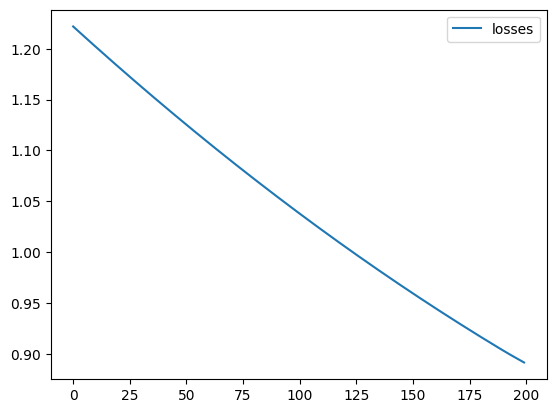

In [5]:
sns.lineplot(data=pd.DataFrame(losses, columns=["losses"]))